# DS case study


## Data Info

In [34]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt

In [35]:
dataset = pd.read_csv("C:\\Users\\kruth\\OneDrive\\Desktop\\loan.csv")
print(dataset.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

C:\Users\kruth\AppData\Local\Temp\ipykernel_20472\2794947576.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("C:\\Users\\kruth\\OneDrive\\Desktop\\loan.csv")


In [36]:
print("Dataset Info: \n")
dataset.info()
print("\nShape:\n", dataset.shape)

Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB

Shape:
 (39717, 111)


In [37]:
dataset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning and Analysis

### Missing values

In [38]:
# select columns which have all values missing more than 50%
res = dataset.isna().sum()
type(res)
col_most_miss = []
col_less_miss = []
for i in res.index:
    if res[i] >= dataset.shape[0] / 2:
        col_most_miss.append(i)
    else:
        col_less_miss.append(i)

print("no. of columns we can consider: ",len(col_less_miss))
print("no. of columns having missing more than half of data: ",len(col_most_miss))

no. of columns we can consider:  54
no. of columns having missing more than half of data:  57


In [39]:
new_data = dataset[col_less_miss]

In [40]:
new_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [41]:
new_data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Data Types

In [42]:
# check dtype of columns
dtypes_ = new_data.dtypes
int_variables = []
float_variables = []
object_variables = []

for i in dtypes_.index:
    if dtypes_[i] == 'int64':
        int_variables.append(i)
    elif dtypes_[i] == 'float64':
        float_variables.append(i)
    elif dtypes_[i] == 'object':
        object_variables.append(i)
    else:
        print('Error')

int_data = new_data[int_variables]
float_data = new_data[float_variables]
object_data = new_data[object_variables]

# convert int to float
converted_int = int_data.astype(float)

# append float and newly convert float data
data_cleaned_dtype = pd.concat([converted_int, float_data], axis=1)
data_cleaned_dtype.head()

,id,member_id,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501.0,1296599.0,5000.0,5000.0,0.0,1.0,3.0,0.0,13648.0,9.0,...,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0
1,1077430.0,1314167.0,2500.0,2500.0,0.0,5.0,3.0,0.0,1687.0,4.0,...,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0
2,1077175.0,1313524.0,2400.0,2400.0,0.0,2.0,2.0,0.0,2956.0,10.0,...,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0
3,1076863.0,1277178.0,10000.0,10000.0,0.0,1.0,10.0,0.0,5598.0,37.0,...,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0
4,1075358.0,1311748.0,3000.0,3000.0,0.0,0.0,15.0,0.0,27783.0,38.0,...,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,0.0,0.0,0.0


Object data type

In [43]:
object_data.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL


In [44]:
val_cnt = pd.value_counts(object_data["loan_status"])
print(val_cnt)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [45]:
for col in object_data.columns:
    val_cnt = pd.value_counts(object_data[col])
    print(val_cnt)
    print(len(val_cnt))
    print()


term
 36 months    29096
 60 months    10621
Name: count, dtype: int64
2

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64
371

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
7

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64
35

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser P

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64
19615

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64
823

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY

We see the many categorical variables are not really useful for our analysis since thye have too many categories. We will drop them.
We also notice that 'int_rate' is a string and not a float. We will convert it to float.

In [46]:
# consider those variables with less than or equal to 50 unique values
cat_cols = [] # list of categorical variables needed
for col in object_data.columns:
    val_cnt = pd.value_counts(object_data[col])
    if val_cnt.shape[0] <= 50 and val_cnt.shape[0] > 1:
        cat_cols.append(col)
        print(col, ":", val_cnt.shape[0])

obj_data_reqd = object_data[cat_cols]

term : 2
grade : 7
sub_grade : 35
emp_length : 11
home_ownership : 5
verification_status : 3
loan_status : 3
purpose : 14
addr_state : 50


Encoding

In [47]:
# use ordinal encoder to encode categorical variables
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_variables = pd.DataFrame(encoder.fit_transform(obj_data_reqd), columns=obj_data_reqd.columns)
# concat the encoded variables with the numerical variables
data_cleaned_dtype = pd.concat([data_cleaned_dtype, encoded_variables], axis=1)

In [48]:
# Convert interest rates to float
data_cleaned_dtype['int_rate'] = object_data['int_rate'].str.rstrip('%').astype(float) / 100.0
data_cleaned_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  float64
 1   member_id                   39717 non-null  float64
 2   loan_amnt                   39717 non-null  float64
 3   funded_amnt                 39717 non-null  float64
 4   delinq_2yrs                 39717 non-null  float64
 5   inq_last_6mths              39717 non-null  float64
 6   open_acc                    39717 non-null  float64
 7   pub_rec                     39717 non-null  float64
 8   revol_bal                   39717 non-null  float64
 9   total_acc                   39717 non-null  float64
 10  policy_code                 39717 non-null  float64
 11  acc_now_delinq              39717 non-null  float64
 12  delinq_amnt                 39717 non-null  float64
 13  funded_amnt_inv             397

so, we have reduced the data to 41 columns

## Target Variable separation

loan_status
2.0    32950
0.0     5627
1.0     1140
Name: count, dtype: int64


<AxesSubplot: title={'center': 'Target value count'}, xlabel='loan_status'>

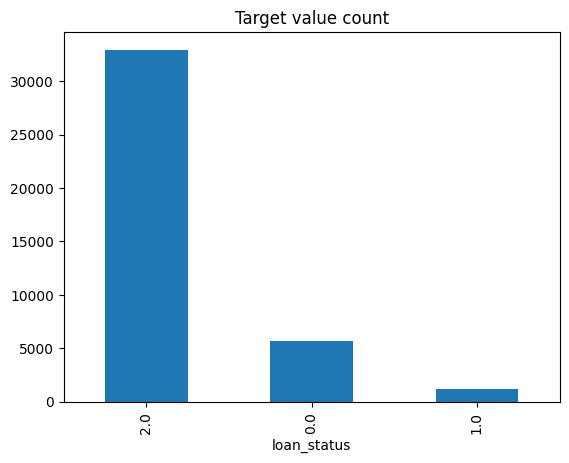

In [49]:
# identified target variable is 'loan_status'
target_val_cnt = data_cleaned_dtype['loan_status'].value_counts()
print(target_val_cnt)

# values encoded:
target_values = {'Fully Paid': 2.0, 'Charged Off': 0, 'Current': 1.0}

# graph
target_val_cnt.plot(kind='bar', title='Target value count')

In [50]:
# separate the target variable
y = data_cleaned_dtype['loan_status']
X = data_cleaned_dtype.drop('loan_status', axis=1)

### Histogram

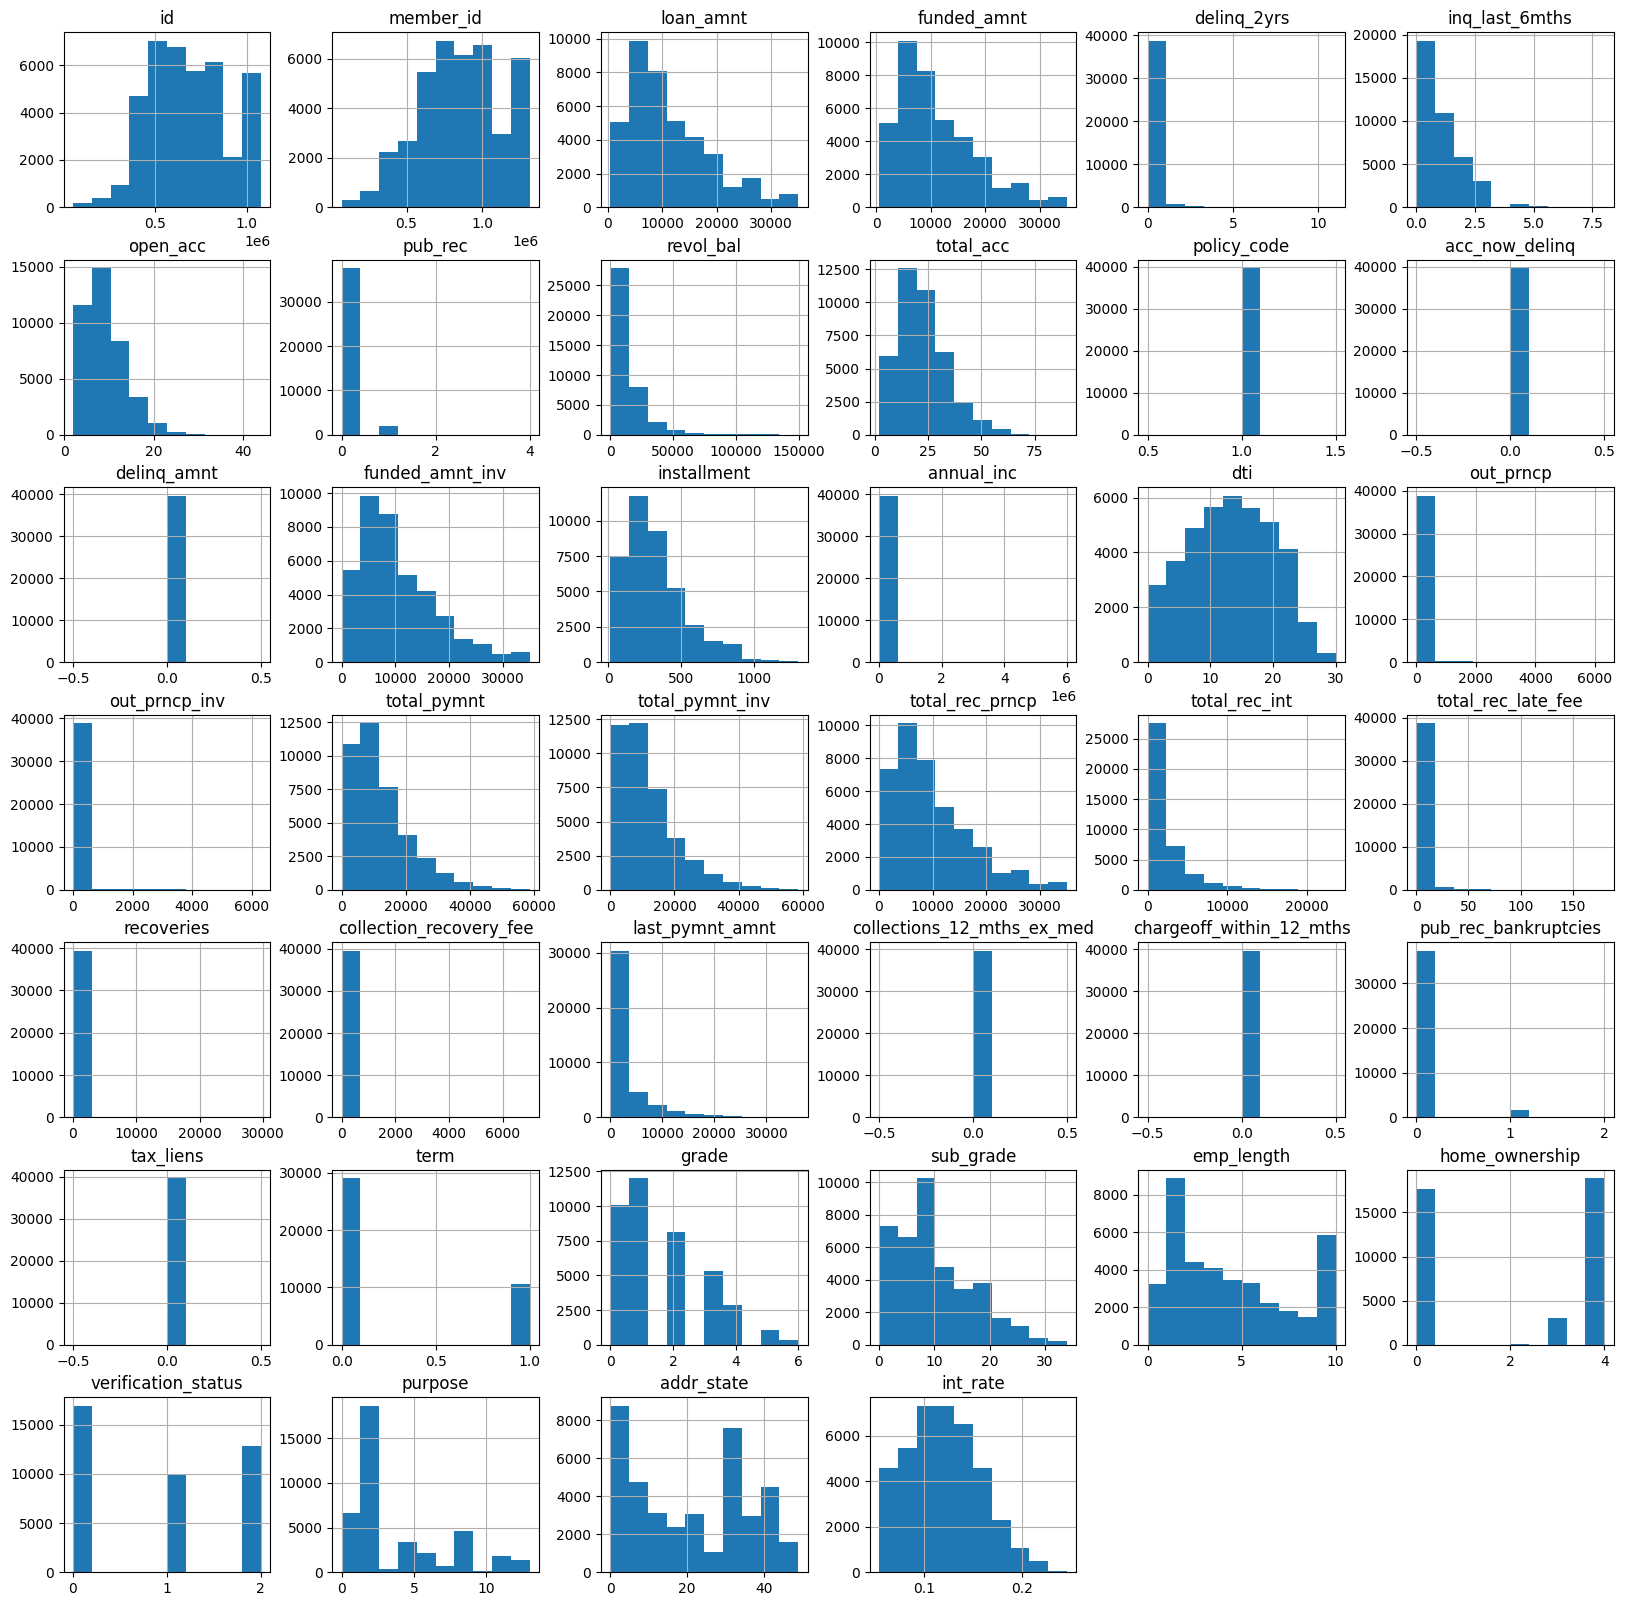

In [51]:
X.hist(figsize=(20,20))
plt.show()

Now, we also notice that some features have only one value, which is not useful for our analysis. We will drop these features.

In [52]:
# identify the columns having only single value or 2 unique values
single_valued_cols = X.columns[X.nunique() <= 2]
print("dropped: ", single_valued_cols)
X = X.drop(single_valued_cols, axis=1, inplace = False)

dropped:  Index(['policy_code', 'acc_now_delinq', 'delinq_amnt',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens',
       'term'],
      dtype='object')


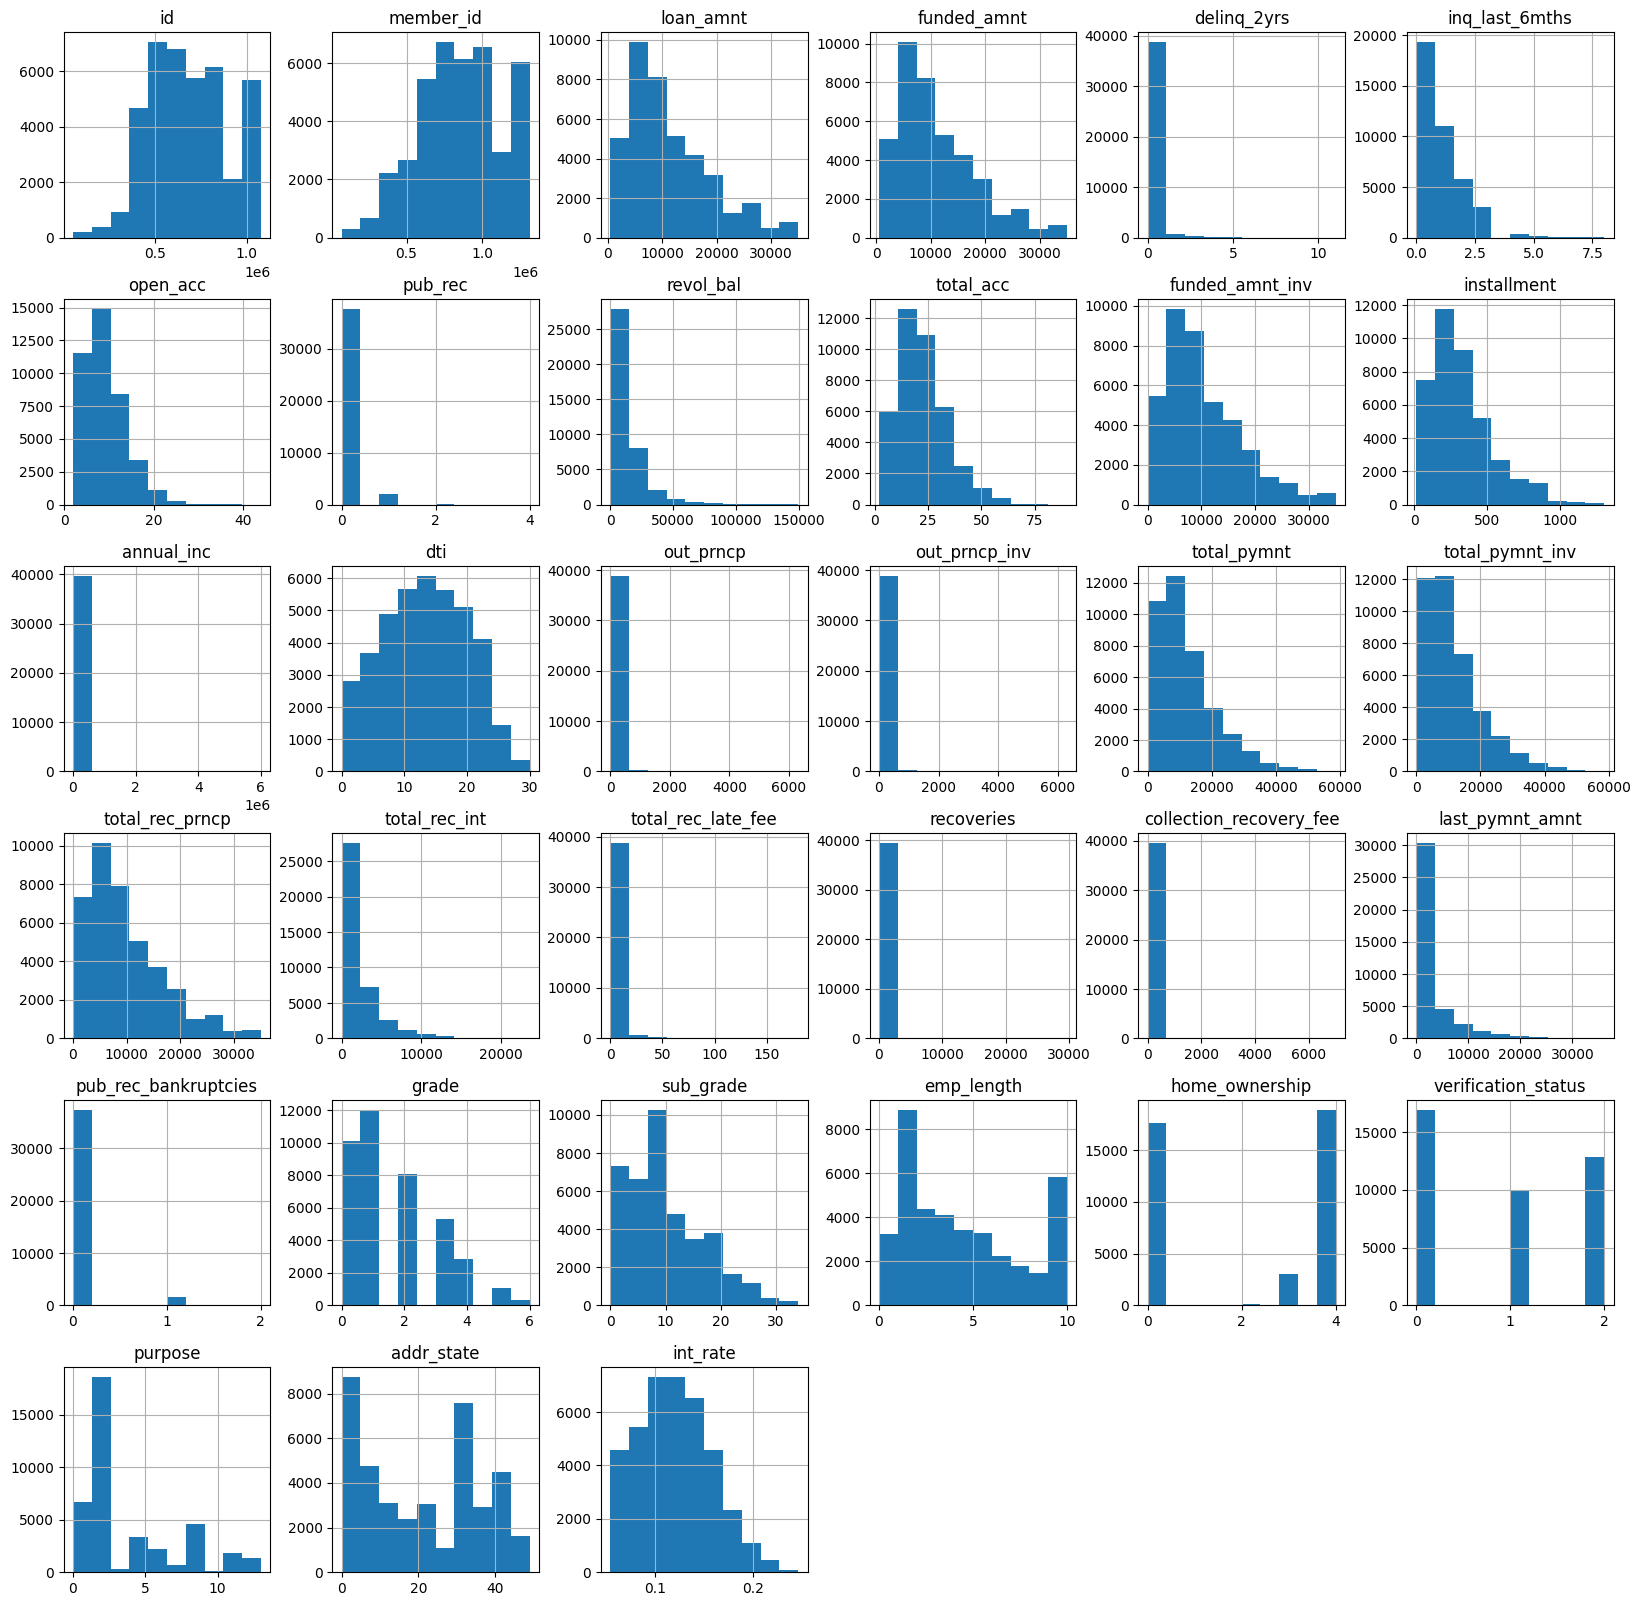

In [53]:
# histogram again
X.hist(figsize=(20,20))
plt.show()

In [54]:
X.shape
features = X.columns

## Split Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

## Impute missing values

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [57]:
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


## Scaling

In [58]:
# use standard scaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Outlier Detection and Removal

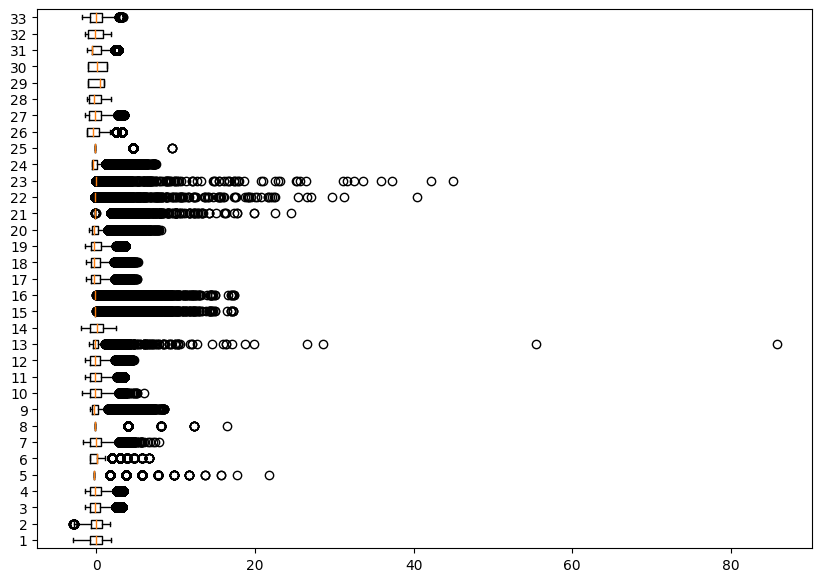

In [59]:
# plot boxplot
plt.figure(figsize = (10, 7))
plt.boxplot(X_train_scaled, vert = False)
plt.show()

In [60]:
# use automatic outlier detection to remove outliers from the dataset
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
iso.fit(X_train)
yhat = iso.predict(X_train)
yhat1 = iso.predict(X_test)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
mask1 = yhat1 != -1
X_test, y_test = X_test[mask1, :], y_test[mask1]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(23949, 33) (23949,)
(11792, 33) (11792,)


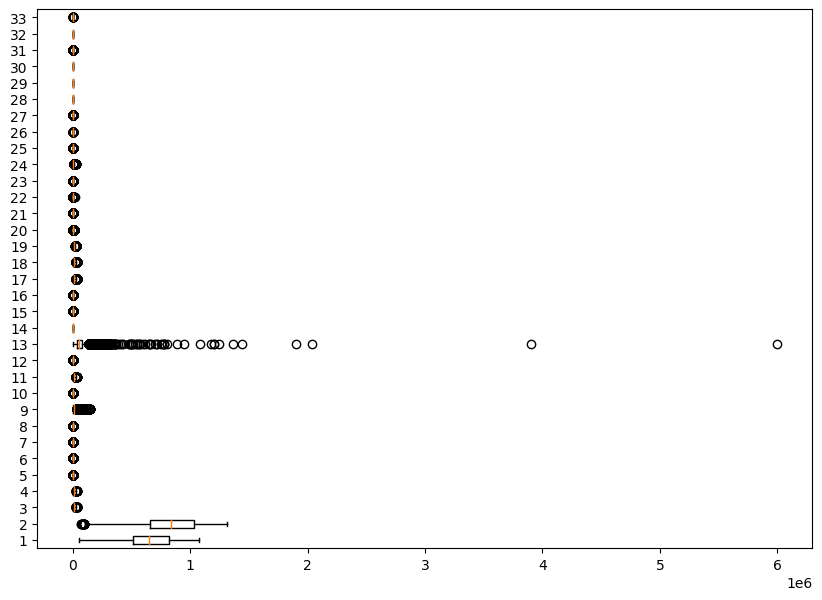

In [61]:
# plot boxplot
plt.figure(figsize = (10, 7))
plt.boxplot(X_train, vert = False)
plt.show()

We see that most of the Outliers are removed from the data. We can now proceed with the analysis.

## EDA

<AxesSubplot: >

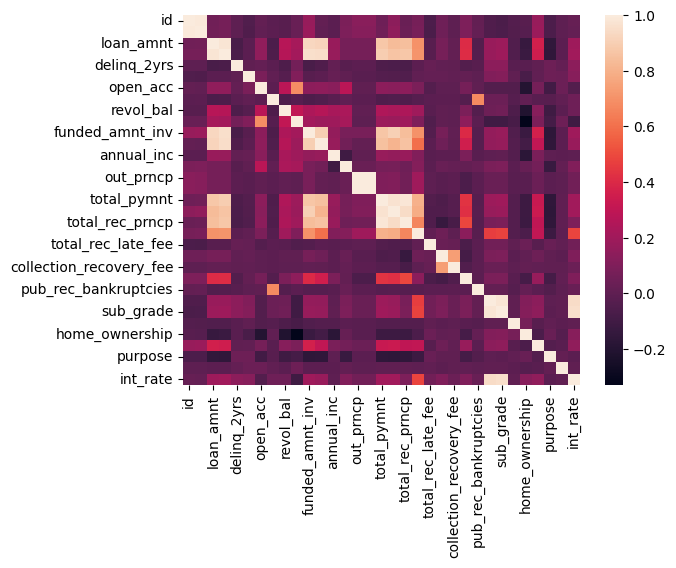

In [63]:
# correlation matrix heat map
corr = pd.DataFrame(X_train, columns = features).corr()
import seaborn as sns
sns.heatmap(corr)

# Multiclass classification

In [ ]:
# use KNN classifier to predict loan status
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred) * 100, "%")
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))


Accuracy score:  86.5523389082265 %
Confusion matrix: 
 [[  123     0  1406]
 [    0     0   177]
 [    1     0 10072]]


In [ ]:
# perform cross validation on the dataset
scores = cross_val_score(knn, X_train, y_train, cv=5)
for i in range(len(scores)):
    print("Fold %d: %0.2f" % (i+1, scores[i]))
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation: ", scores.std())

Fold 1: 0.86
Fold 2: 0.86
Fold 3: 0.86
Fold 4: 0.86
Fold 5: 0.86
Mean Accuracy:  0.8587832415185985
Standard Deviation:  0.0007777038345866757


In [ ]:
# use Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred) * 100, "%")
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))


Accuracy score:  98.59920196960694 %
Confusion matrix: 
 [[ 1364     0   165]
 [    0   177     0]
 [    0     0 10073]]


In [ ]:
# perform cross validation on the dataset
scores = cross_val_score(dt, X_train, y_train, cv=5)
for i in range(len(scores)):
    print("Fold %d: %0.2f" % (i+1, scores[i]))
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation: ", scores.std())

Fold 1: 0.99
Fold 2: 0.99
Fold 3: 0.98
Fold 4: 0.99
Fold 5: 0.99
Mean Accuracy:  0.9871811139916588
Standard Deviation:  0.001400898809426651


# The End